***DLA vizesi oncesi son ders (diger vizelerden sonraki hafta 23.11.2022)***
<br>
***.mount()*** <br>
Drivedan dosya okuycaz mount ile. Mount dış kaynaga erisim saglar.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Colab ----> drive <br>
  ...^--mounted--^   <br>
colabta drive'a baglanacagiz. Yukaridaki kodu calistirinca izin veriyor musun diye bir uyari cikiyor--->izin ver

In [ ]:
import pandas as pd
mydata=pd.read_csv("gdrive/My Drive/Colab Notebooks/Deep Learning Application_Blavcil/Week8/diabetes.csv")

In [ ]:
mydata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


iloc ile yapabilirsin bu da alternatif olarak ***drop*** ile

In [ ]:
X=mydata.drop(columns=['Outcome'])
y=mydata['Outcome']
print(X,y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25)

**LET'S DO KNN** <br>
Tum KNN'lere bak ve benim icin en iyisi hangisi bana cek cikar

In [ ]:
#lets do knn
import numpy as np
from sklearn.model_selection import GridSearchCV #bunu kullanicaz genellikle
from sklearn.neighbors import KNeighborsClassifier
#a object of knn generated without giving parameters , bu teknik bir yazi ama aldiginda hepsinde kullanirsin
knn=KNeighborsClassifier()
params_knn={'n_neighbors':np.arange(1, 25)}
knn_gs=GridSearchCV(knn,params_knn,cv=5)
knn_gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#Find the best model
knn_best=knn_gs.best_estimator_
print(knn_gs.best_params_)

{'n_neighbors': 8}


Boosting baggingi hatirlayalim biraz <br>
NOTLARA BAK

*Random Forest bagging yontemidir


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

#create parameter dictionary to find the best among them
params_rf={'n_estimators': [50,100,200]} #bu hicbir ornekte degismez odevde kullanabilirsin
#bu n olarak 50 yi mi kullanayim 100 mu 200 mu hepsine bakacak istersen 50,75,90 dene
#Bunun tipi dictioary

rf_gs=GridSearchCV(rf,params_rf,cv=5) #standart 5 kullanabilirsin

rf_gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [ ]:
#hangisi benim icin en iyi ona bakicam
rf_best=rf_gs.best_estimator_
print(rf_gs.best_params_)

# 200 cikti benim icin en iyisi 200 mus demek

{'n_estimators': 200}


***Regression*** <br>
 Logistic Regression kullanicaz odevde kullanmak zorunda degilsin

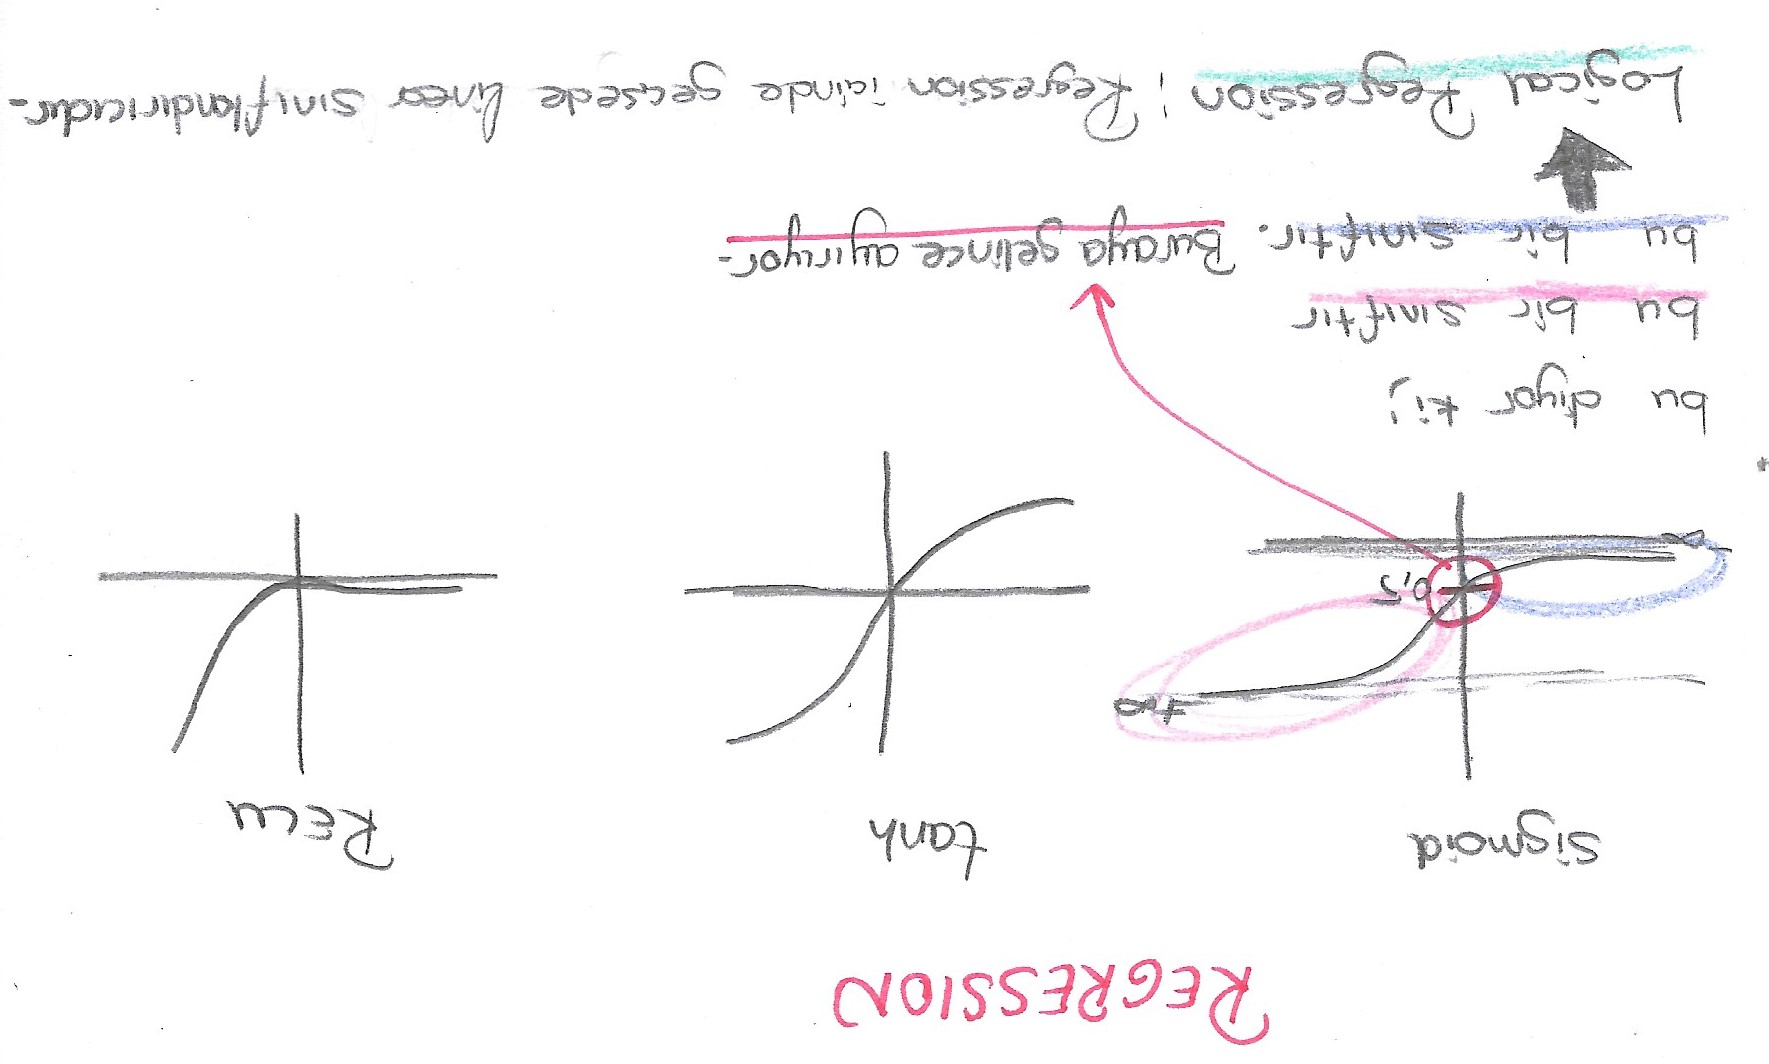

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Eger boostingle de calismak istersen asagidaki bosting partini buraya eklemelisin
#ben boostingsiz de nasil olacagini gorulsun diye su an eklemiyorum

In [ ]:
print('knn', knn_best.score(X_test,y_test))  #en iyi knn score a baktim, knn de en iyi knn i buldum
print('rf', rf_best.score(X_test,y_test))
print('log_reg', log_reg.score(X_test,y_test))

knn 0.734375
rf 0.7864583333333334
log_reg 0.765625


In [ ]:
from sklearn.ensemble import VotingClassifier
estimators=[('knn',knn_best),('rf',rf_best),('log_reg',log_reg)]
ensemble=VotingClassifier(estimators,voting='hard') #voting oylamanin nasil yapilcagi default da hard
# 3 learnerim var knn rf logreg bunlar oylamaya giricek benim icin hangisi daha iyi buna karar vericek
ensemble.fit(X_train,y_train)
print(ensemble.score(X_test,y_test))

0.7864583333333334


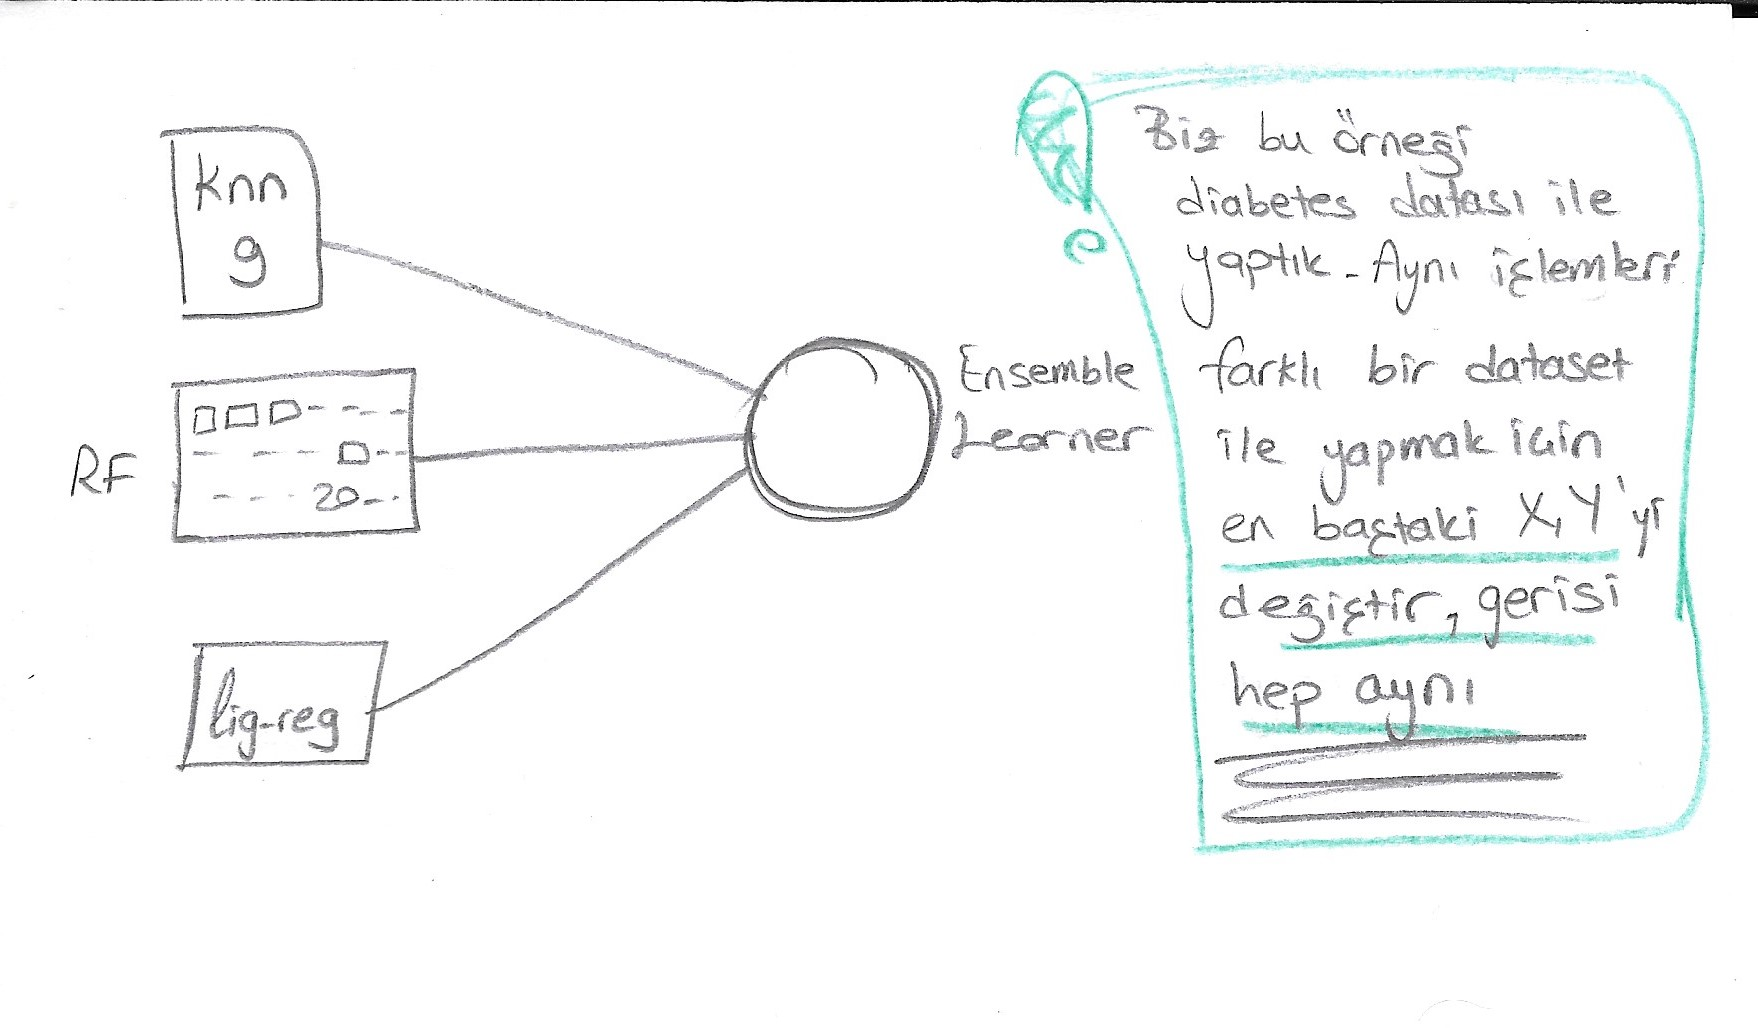

# ** Boosting part**

In [ ]:
#GBM GRADIENT BOOSTING MACHINE
#buna boosting ekleyecegim yukarisi ayni sekilde kalsin eger boosting ile yapmak istiyorsam

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()

params_gbc={'n_estimators': [50,100,200]}

gbc_gs=GridSearchCV(gbc,params_gbc,cv=5)

gbc_gs.fit(X_train,y_train)

gbc_best=gbc_gs.best_estimator_
print(gbc_gs.best_params_)



{'n_estimators': 50}


In [ ]:
print('knn', knn_best.score(X_test,y_test))  #en iyi knn score a baktim, knn de en iyi knn i buldum
print('rf', rf_best.score(X_test,y_test))
print('log_reg', log_reg.score(X_test,y_test))
print('gbc', gbc_best.score(X_test,y_test))

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators=[('knn',knn_best),('rf',rf_best),('log_reg',log_reg),('gbc',gbc_best)]
ensemble=VotingClassifier(estimators,voting='hard') #voting oylamanin nasil yapilcagi defaultda=hard olarak tanimlanmis
# 3 learnerim var knn rf logreg bunlar oylamaya giricek benim icin hangisi daha iyi buna karar vericek
ensemble.fit(X_train,y_train)
print(ensemble.score(X_test,y_test))

son iki kod blogunu icine boosting bolumlerini ekleyerek tekrar yapiyoruz

yukarida splitte test size = 0.50 dersek yani daha az data verirsek train icin neler olur degistirip bakabilirsin